# Heterogeneous Agents - Solving the Aiyagari problem - OSE - Tony Smith 

## Jeanne Sorin

### Calibrate the transition probability

In [196]:
import numpy as np
from scipy.optimize import root
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy import interpolate


In [16]:
# Define the employment status
ϵ = np.array((0.0, 0.0))

# Calibrate the transition probability
A = np.array([0.9, 0.1])
Trans = np.zeros((2,2))
Trans[0,0] = 0.9
Trans[0,1] = 1 - 0.9
Trans[1,0] = 0.9
Trans[1,1] = 1-0.9


[[0.9 0.1]
 [0.9 0.1]]


In [ ]:

def rf(k, u):
    r = α*k**(α-1)*(1-u)**(1-α)
    return r
    
def wf(k, u):
    w = (1-α)*k**(α) * (1-u)**(-α)
    return w

# Define the FOC of the HH

def utility(c):
    if c > 0:
        U = np.log(c)
    if c <= 0:
        U = -99999999
    return U

def uprime(c):
    Up = -1/(c)
    return Up


    
    


### Compute the steady state equilibrium value of aggregate capital kss*

#### 1. Guess on kss from the representative-agent economy in ss

In [ ]:
'''
From the intertemporal EE, and the the definition of k and w as a function of k
'''

def find_K_SS(α, β, δ):
    k_ss = ((1/β - 1 + δ) * 0.9**(α-1) * α**(-1))**(1/(α-1))
    return(k_ss)

α = 0.36
β = 0.96
δ = 0.06


Kss = find_K_SS(α, β, δ)

#### 2. Restrict k to lie on a grid of N = 200 points in the interval [0.001, 40] and then iterate on the Bellman equation to find v(k, e, kss) at each of the pairs in k*e

Use value function iteration for the policy function to know how k' depends on k.

In [ ]:
### Set parameters 
n = 200
k = np.linspace(0.001, 40, n)
tol = 1e-6
V_guess = np.zeros((2, len(k)))
ϵ = np.zeros(2)
ϵ[0] = 1

In [242]:
def interpolant(x,Kgrid,Vp):
    t = interpolate.interp1d(Kgrid,Vp,fill_value="extrapolate")
    return t(x)

def Bellman(kp, *params):
    Kgrid, Vp, ik, ie, interpolant, r, w = params
    kt = Kgrid[ik]
    #print("kt is ", kt)
    
    
    V1 = utility(r*kt + w*ϵ[ie] + (1-δ)*kt - kp)
    fut = 0
    for i in range(Nϵ):
        fut +=  Π[l,i]*interpolant(Kp,Kgrid,Vp[i,:])  
    
    Value = Today + β * fut

    V = V1 + V2
    #print("-V is ", -V)
    return(-V)

In [247]:
n = 200
Nϵ = 2
Kgrid = np.linspace(0.01, 40, n)
tol = 1e-6
Vp = 0.1*np.ones([Nϵ, n])
ϵ = np.zeros(Nϵ)
ϵ[0] = 1
Kp=0.01*np.ones([Nϵ, n])
Vp_new = np.zeros([Nϵ, n])
Kp_new = np.zeros([Nϵ, n])

def iterate(Kgrid, Vp, ik, interpolant, Kp, u):
    ### Iterate
    iter = 0
    epsi = 1
    
    while True:
        iter += 1

        All_V1 = np.zeros((len(Kgrid)))
        All_V2 = np.zeros((len(Kgrid)))
        
        # When starting in ϵ=0
        for ik in range(n):
            for ie in range(Nϵ):
                r = rf(Kss, u)
                w = wf(Kss, u)    
                params1 = Kgrid, Vp, ik, ie, interpolant, r, w
                Solve = minimize(Bellman, Kp[ie, ik], args=params1)
                Kp_new[ie, ik] = Solve.x
                Vp_new[ie, ik] = - Solve.fun

        epsi = ((Vp_new - Vp) ** 2).sum()
        print("Error term: ", epsi)
        if epsi < tol:
            break
        #Update
        Kp=Kp_new*1.
        Vp = Vp_new*1.
        iter=iter+1

        
    return(Vp_new, Kp_new)


In [248]:
Sol = iterate(Kgrid, Vp, ik, interpolant, Kp, 0.1)

Error term:  55982.30483660395
Error term:  3.999901320539319e+18
Error term:  3.490740408177473e+22
Error term:  5.11525124389617e+37
Error term:  7.429141484015593e+52
Error term:  1.0834886672531065e+68
Error term:  3.5617008423016073e+84
Error term:  3.768997180371767e+100
Error term:  5.394653053227312e+116
Error term:  7.043250187827513e+132
Error term:  9.519707824551928e+148
Error term:  1.2666320358077582e+165
Error term:  1.6992615919031994e+181
Error term:  2.2638260192390974e+197
Error term:  3.01722213644042e+213


/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Error term:  4.0208125265124146e+229


/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Error term:  5.361556548395894e+245
Error term:  7.144843781426173e+261


/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Error term:  9.521509432381199e+277
Error term:  1.2687923077511404e+294


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new =

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-pa

/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-pa

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-pa

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/pytho

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-pa

/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-pa

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-pa

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/pytho

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/pytho

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_

Error term:  inf


/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/pytho

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:87: RuntimeWarning: overflow encountered in multiply
  return f(xk + s*pk, *args)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:90: RuntimeWarning: overflow encountered in multiply
  gval[0] = fprime(xk + s*pk, *newargs)
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_

Error term:  inf
Error term:  inf
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  n

Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  nan
Error term:  n

KeyboardInterrupt: 

In [146]:
Vguess = Sol[0]
Kpguess = Sol[1]

print("Vguess is ", Vguess)
print("Kpguess is ", Kpguess)

Vguess is  [[-5.06240589e-17  0.00000000e+00  0.00000000e+00  1.07913272e-16
   0.00000000e+00  0.00000000e+00  5.68135748e-16 -1.19504178e-15
   0.00000000e+00  2.58221690e+01  2.78198076e+01  2.96483913e+01
   3.13353554e+01  3.29018626e+01  3.43645396e+01  3.57367729e+01
   3.70294648e+01  3.82516271e+01  3.94107981e+01  1.91513472e-15
   4.71844785e-15 -1.83186799e-15  1.53765889e-14 -2.22044605e-16
   4.86865318e-16 -1.39242856e-16  2.50663154e-15  1.25133358e-16
   3.49050693e-16  0.00000000e+00 -5.81183439e-13  1.44035684e-15
   0.00000000e+00  0.00000000e+00  1.77338744e-16  7.51174576e-14
   1.98335483e-15  0.00000000e+00 -1.65152879e-13  0.00000000e+00
   3.39411052e-15 -6.75762291e-15 -3.62784559e-16  1.40242526e-14
   0.00000000e+00  2.62239390e-15  0.00000000e+00 -8.89699942e-16
  -2.32244333e-15  0.00000000e+00  0.00000000e+00  1.09982843e-14
   0.00000000e+00 -7.86874865e-16  4.85125341e-15  1.05611594e-12
  -8.63065702e-16  1.60511444e-14  1.10727043e-12 -2.55757543e-16

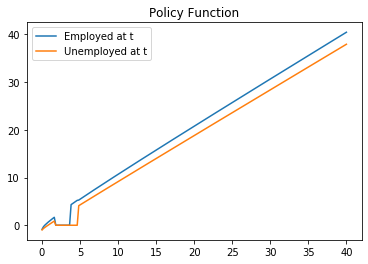

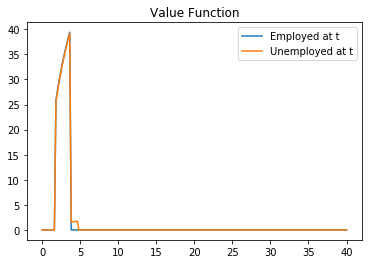

In [221]:
plt.plot(krep, Kpguess[0], label="Employed at t")
plt.plot(krep, Kpguess[1], label="Unemployed at t")
plt.legend()
plt.title("Policy Function")
plt.show()


plt.plot(krep, Vguess[0,:], label="Employed at t")
plt.plot(krep, Vguess[1,:], label="Unemployed at t")
plt.legend()
plt.title("Value Function")
plt.show()

#### 3. Simulate a long time series for a typical consumer using the optimal decision rule (computed in 2.) and the law of motion for e

In [127]:
Kguess

NameError: name 'Kguess' is not defined

#### 4. Calculate average capital holdings kss^ using the simulated data